In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from My_functions import reverse_colourmap 

In [2]:
files_home = "./"
filename = "C1D_PAPA_5d_20100615_20150614_pisces_ptrc_T.nc"

In [3]:
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)

In [4]:
##### Pisces variables #############
nano = data["nano_phyto"].to_numpy()
dia = data["diatoms"].to_numpy()
zoo = data["microzoo"].to_numpy()
meso = data["mesozoo"].to_numpy()
no3 = data["NO3"].to_numpy()
dom = data["DOM"].to_numpy()
##### depth of vertical levels ######
depth = data['deptht'].to_numpy()
##### time counter ##################
time_counter = data['time_counter'].to_numpy()

In [5]:
depth_min = 0
depth_max = 300

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]


In [6]:
variables = ["nano", "dia","zoo", "meso","no3","dom"]

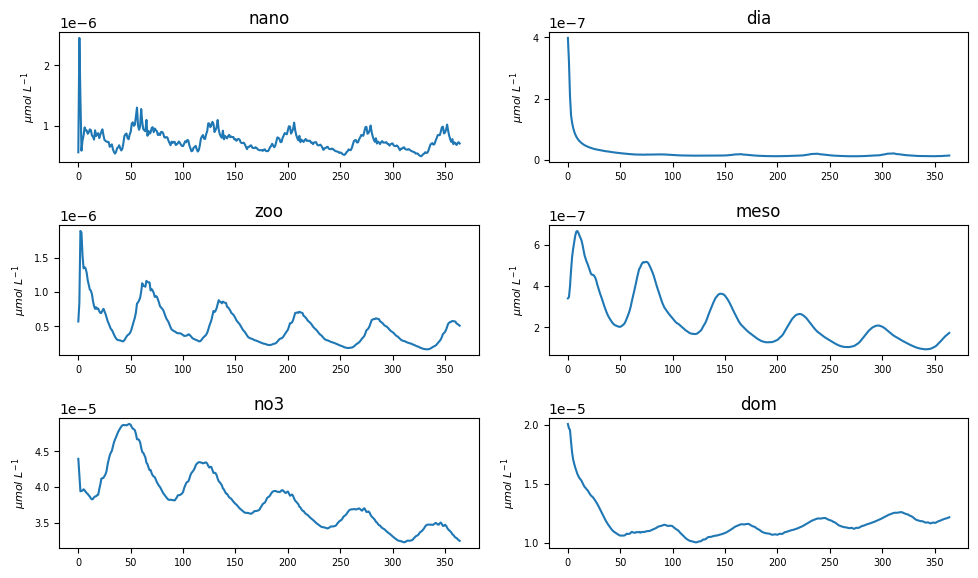

In [7]:
fig = plt.figure(figsize=(10,6))

nb = int(np.ceil(len(variables)/2))
cptr = 0
for var in variables:
    cptr+=1
    exec("v =" +  var + "[:,dep_min_id:dep_max_id]")
    v_mean = np.mean(v,axis=1)
    ax = fig.add_subplot(nb,2,cptr)
    plt.plot(v_mean)
    
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.title(var , fontsize=12) 
    plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
    

# Space between subplots
fig.tight_layout(pad=1.5)

In [8]:
len(time_counter[73:])

292

In [9]:
x = np.arange(0,nano.shape[0])*5
[X,dep] = np.meshgrid(x,depth[dep_min_id:dep_max_id])

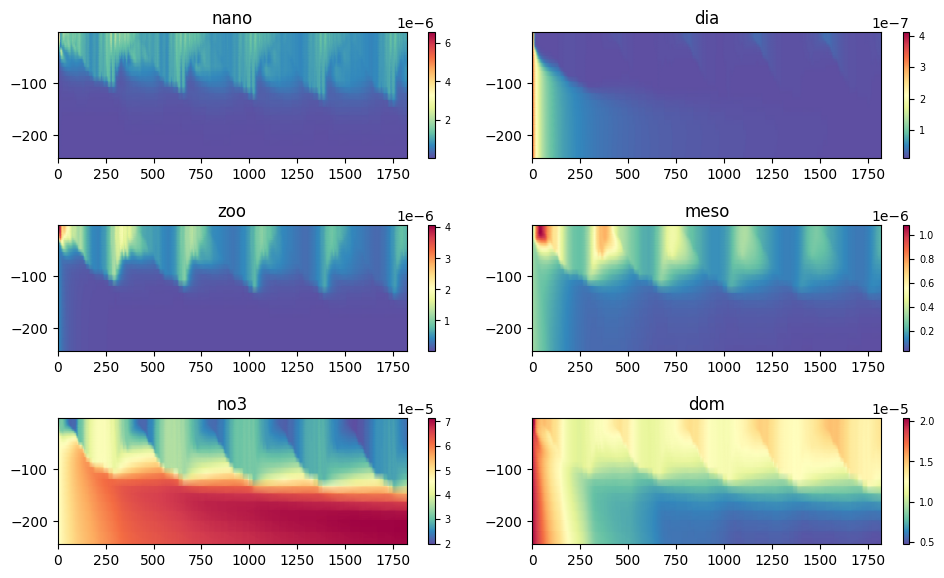

In [10]:
my_cmap = reverse_colourmap(plt.cm.Spectral)
fig = plt.figure(figsize = (10,6))
cptr=-1
for var in variables:
    cptr+=1
    ax = fig.add_subplot(nb,2,cptr+1)
    exec("v_ = np.transpose(" + variables[cptr] + ")")
    v = v_[dep_min_id:dep_max_id,:]
    
    pc = ax.pcolormesh(X,-dep,v,cmap=my_cmap,shading="gouraud")
    clb=fig.colorbar(pc)
    clb.ax.tick_params(labelsize=7)
    plt.title(var , fontsize=12)

# Space between subplots
fig.tight_layout(pad=1.5)

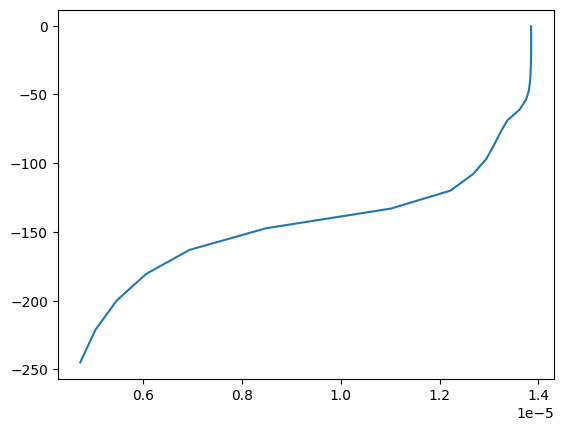

In [11]:
plt.figure()
plt.plot(v[:,-1],-dep[:,-1])